# L05c - Nearest Centroid
- Instructor: Dalcimar Casanova (dalcimar@gmail.com)
- Course website: https://www.dalcimar.com/disciplinas/aprendizado-de-maquina
- Bibliography: based on lectures of Dr. Sebastian Raschka

<img src="https://i.stack.imgur.com/ZFmsQ.png">

<img src="https://www.researchgate.net/profile/Sam_Morley-Short/publication/286513346/figure/fig9/AS:668583495495684@1536414135070/A-visualisation-of-the-nearest-centroid-classification-algorithm-Here-a-training.png" width="300">

In [7]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123, stratify=y)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [10]:
from sklearn.neighbors import NearestCentroid

cn_model = NearestCentroid()
cn_model.fit(X_train_std, y_train)

cn_model.centroids_

array([[-0.98845111,  0.87953763],
       [ 0.05163551, -0.65051142],
       [ 0.9368156 , -0.22902621]])

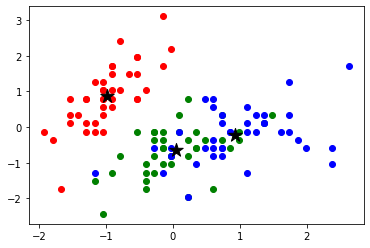

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='r')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='g')
plt.scatter(X_train_std[y_train==2, 0], X_train_std[y_train==2, 1], c='b')

plt.scatter(cn_model.centroids_[:,0], cn_model.centroids_[:,1], s=200, marker='*', c='k')

In [12]:
y_pred = cn_model.predict(X_test_std)
print(y_pred)
print(y_test)

[1 0 2 2 0 0 2 1 1 0 0 2 1 1 2 2 0 0 0 0 0 2 2 2 2 1 1 2 1 2]
[1 0 2 2 0 0 2 1 2 0 0 1 2 1 2 1 0 0 0 0 0 2 2 1 2 2 1 1 1 1]


In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7333333333333333

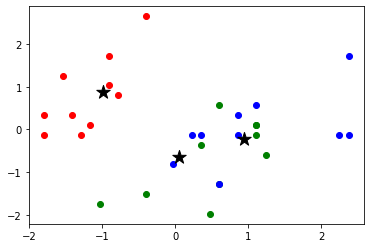

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='r')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='g')
plt.scatter(X_test_std[y_test==2, 0], X_test_std[y_test==2, 1], c='b')

plt.scatter(cn_model.centroids_[:,0], cn_model.centroids_[:,1], s=200, marker='*', c='k')